In [16]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Input, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
batch_size = 32
path = '/Users/akashzamnani/datasets/image-classification/satellite_images/'
height = 72
width = 128

In [6]:
train = tf.keras.utils.image_dataset_from_directory(
    path,
    subset='training',
    validation_split=.2,
    batch_size=batch_size,
    image_size=(height,width),
    seed=1234
    
)

val = tf.keras.utils.image_dataset_from_directory(
    path,
    subset='validation',
    validation_split=.2,
    seed= 1234,
    image_size=(height,width),
    batch_size= batch_size
    
)

Found 5631 files belonging to 4 classes.
Using 4505 files for training.
Found 5631 files belonging to 4 classes.
Using 1126 files for validation.


2024-07-11 12:56:14.606545: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


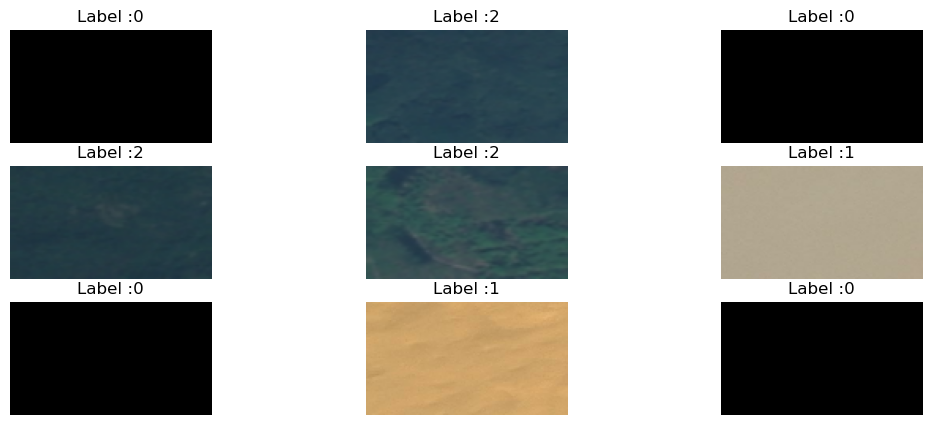

In [9]:
plt.figure(figsize=(13,5))
for i ,(image,labels) in enumerate(train.take(1)):
    for j in range(9):
        ax = plt.subplot(3,3,j+1)
        plt.imshow(image[j].numpy().astype('uint8'))
        plt.title(f"Label :{labels[j].numpy()}")
        plt.axis('off')

2024-07-11 12:57:02.991719: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


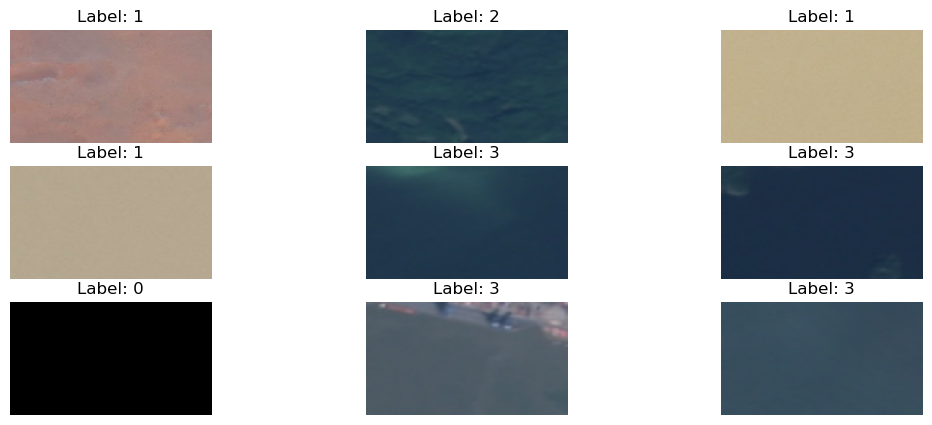

In [10]:
plt.figure(figsize=(13, 5))
for i, (images, labels) in enumerate(val.take(1)):
    for j in range(9):
        ax = plt.subplot(3, 3, j + 1)
        plt.imshow(images[j].numpy().astype("uint8"))
        plt.title(f"Label: {labels[j].numpy()}")
        plt.axis("off")
plt.show()

In [13]:
amount = len(set(label for _, labels in train for label in labels.numpy()))
print(f"There are {amount} different Classes")

There are 4 different Classes


2024-07-11 12:58:19.431706: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [14]:
classes = {
    0: "cloudy",
    1: "desert",
    2: "water",
    3: "green_area"
}

In [17]:
model = tf.keras.Sequential([
    Input(shape=(height,width,3)),
    tf.keras.layers.Rescaling(1. /255),
    Conv2D(16,(3,3),padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(32,(3,3),padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(64,(3,3),padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(128,(3,3),padding='same',activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(amount,activation='softmax')
    
])

In [18]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 72, 128, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 72, 128, 16)    │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 36, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 36, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 18, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 16, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 9, 16, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 622,372 (2.37 MB)

 Trainable params: 622,372 (2.37 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.fit(train,validation_data= val, epochs=20,)

Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.7025 - loss: 0.6164 - val_accuracy: 0.8623 - val_loss: 0.2795
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.8820 - loss: 0.2557 - val_accuracy: 0.8126 - val_loss: 0.3337
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.8127 - loss: 0.3232 - val_accuracy: 0.8712 - val_loss: 0.2502
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.9068 - loss: 0.2114 - val_accuracy: 0.9325 - val_loss: 0.1623
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.9293 - loss: 0.1549 - val_accuracy: 0.8508 - val_loss: 0.3957
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.9303 - loss: 0.1618 - val_accuracy: 0.9565 - val_loss: 0.1221
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9425 - loss: 0.1274 - val_accuracy: 0.8677 - val_loss: 0.2329
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9395 - loss: 0.1253 - val_accu